# Hotel Booking Demand
Hilton Hotels & Resorts, a leading multinational hospitality company in the world has revised the long-term business goal to improve revenue by 30% in next 3 years and  the management of Hilton decided to focus on distribution channels, market segment and the customer preferences while booking.

We aim on the ways to improve customer base via market segment, distribution channels and offering attractive deals, predicting cancellation rates.


# Opening an exploring data files
- The dataset contains data more than 100,000 rows and the file could be downloaded from this <a href = "https://www.kaggle.com/jessemostipak/hotel-booking-demand">Hotel Booking Demand Dataset</a>


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import calendar
import datetime

#from tabulate import tabulate
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
init_notebook_mode(connected=True) 

# Reading the datafile using pandas


In [5]:
hotel_booking_file = pd.read_csv('hotel_bookings.csv')
hotel_booking_df = pd.DataFrame(hotel_booking_file)
print("Total number of rows {} and columns {} ".format(hotel_booking_df.shape[0],hotel_booking_df.shape[1]))

Total number of rows 119390 and columns 32 


# Concise summary of a DataFrame
- The details of each column with its index, column name, data type.


In [6]:
hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Summary of statistics pertaining to the columns
- min, max, mean, std

In [7]:
hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
print(hotel_booking_df['arrival_date_year'].value_counts()/ hotel_booking_df.shape[0])

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64


## First 5 records in dataframe

In [9]:
hotel_booking_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Exploratory Data Analysis
## Checking whether the dataset is balanced
- comparing the count of is_canceled values 0 and 1

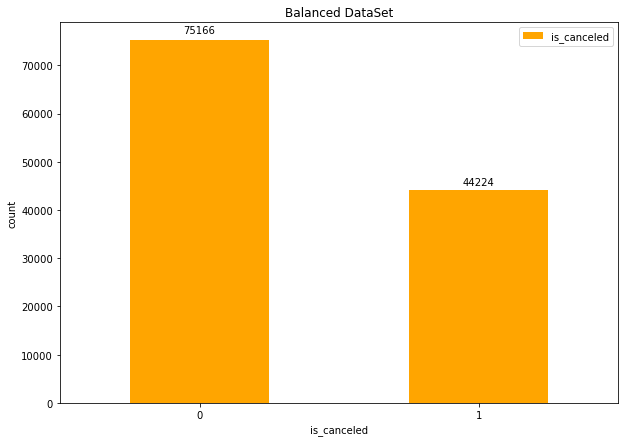

In [10]:
plt.figure(figsize=(10,7))
p = pd.DataFrame()
p = hotel_booking_df['is_canceled'].value_counts()
# print(p)
ax = p.plot(kind='bar',color = 'orange')
plt.title("Balanced DataSet")
plt.xlabel('is_canceled')
plt.ylabel('count')
plt.legend()
plt.xticks(rotation =-360)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}', (x + width/2, y + height*1.02), ha='center')
plt.show()

- The dataset is balanced as there is an observation for each 0 and 1.

### Finding the count of NA in each column

In [11]:
hotel_booking_df.isna().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
hotel_booking_df.isnull().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Box plot of all variables
- Box plot representation of all variables in the dataset


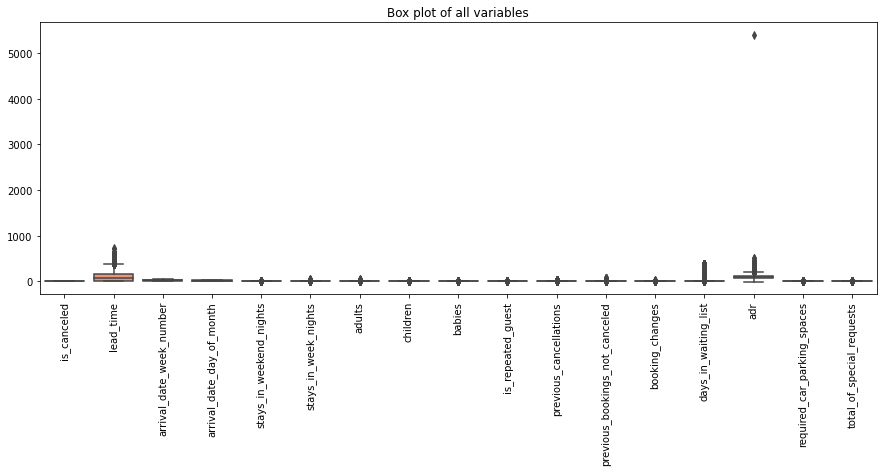

In [13]:
plt.figure(figsize=(15,5))
hotel_df = hotel_booking_df.drop(['arrival_date_year','agent','company'],axis =1)
sns.boxplot(data = hotel_df)
plt.xticks(rotation = 90)
plt.title('Box plot of all variables')
plt.show()

# Boxplot on cancellation and no cancellation

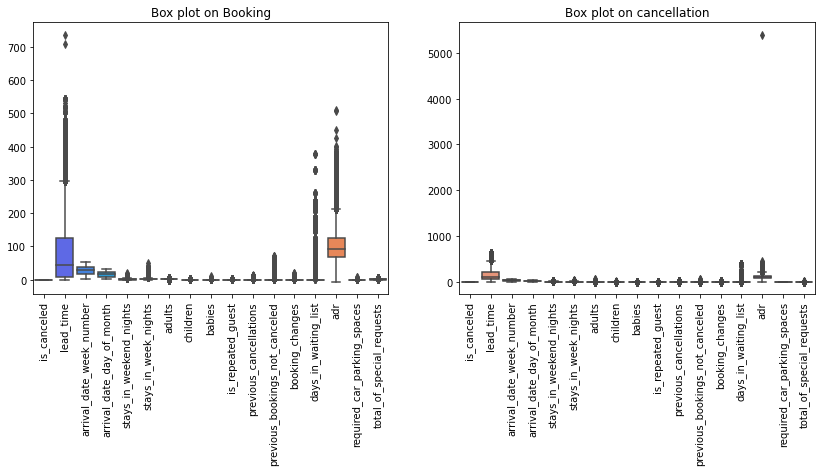

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize= (14,5))
#mpl.rcParams['figure.figsize'] = (25,5)
df_is_cancelled_zero = hotel_booking_df[(hotel_booking_df['is_canceled'] == 0)].drop(['arrival_date_year','agent','company'],axis =1)
df_is_cancelled_one = hotel_booking_df[(hotel_booking_df['is_canceled'] == 1)].drop(['arrival_date_year','agent','company'],axis =1)

sns.boxplot(data = df_is_cancelled_zero, ax = axes[0], palette = 'rainbow').set_title('Box plot on Booking')
sns.boxplot(data = df_is_cancelled_one, ax = axes[1]).set_title('Box plot on cancellation')
#print(df_is_cancelled_one)
for ax in fig.axes:
    mpl.pyplot.sca(ax)
    plt.xticks(rotation =90)
plt.show()

## Facts
- adr has outliers in both booking and cancellations
- lead_time has outliers in booking.

# Identifying & Removing outliers
### Step1 : Creating Quartiles and IQR
- creating Quartiles Q1 and Q3
- calculating IQR


In [15]:
q1 = hotel_booking_df.quantile(.25)
q3 = hotel_booking_df.quantile(.75)
IQR = q3 - q1
print(IQR)

is_canceled                         1.00
lead_time                         142.00
arrival_date_year                   1.00
arrival_date_week_number           22.00
arrival_date_day_of_month          15.00
stays_in_weekend_nights             2.00
stays_in_week_nights                2.00
adults                              0.00
children                            0.00
babies                              0.00
is_repeated_guest                   0.00
previous_cancellations              0.00
previous_bookings_not_canceled      0.00
booking_changes                     0.00
agent                             220.00
company                           208.00
days_in_waiting_list                0.00
adr                                56.71
required_car_parking_spaces         0.00
total_of_special_requests           1.00
dtype: float64


### Step2: Identifying the outliers
- outliers are below q1 - (1.5 * IQR) and above q3 + (1.5 * IQR)

In [16]:
total_count = hotel_booking_df.shape[0]
print("Without removing outliers from dataset, we have {} entries".format(total_count))
# Removing outliers
df_without_outlier = hotel_booking_df[~((hotel_booking_df < (q1- 1.5*IQR))|(hotel_booking_df > (q3 + 1.5*IQR))).any(axis =1)]
no_outlier_count = df_without_outlier.shape[0]
print("Total count after removing outliers is : "+str(no_outlier_count))
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(no_outlier_count/total_count))

Without removing outliers from dataset, we have 119390 entries
Total count after removing outliers is : 55124
The proportion of outliers which exist when compared to the dataframe are: 0.46171371136611106


### Box plot without outliers when cancellation is 1 and cancellation is  0


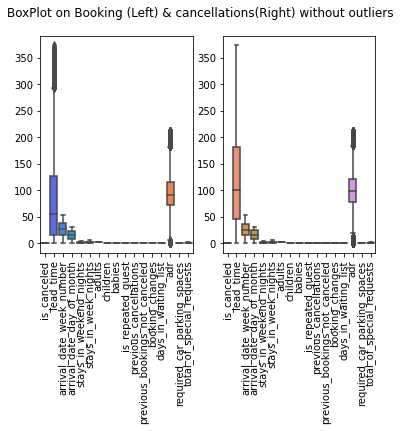

In [17]:
fig,axes = plt.subplots(nrows = 1,ncols = 2)
fig.suptitle("BoxPlot on Booking (Left) & cancellations(Right) without outliers ")
#setting figure size
mpl.rcParams['figure.figsize'] = (15,5)
df_without_outlier_zero = df_without_outlier[(df_without_outlier['is_canceled'] == 0)]
df_without_outlier_zero = df_without_outlier_zero.drop(['arrival_date_year','agent','company'],axis =1)
df_without_outlier_one = df_without_outlier[(df_without_outlier['is_canceled'] == 1)]
df_without_outlier_one = df_without_outlier_one.drop(['arrival_date_year','agent','company'], axis =1)
sns.boxplot(data = df_without_outlier_zero, ax = axes[0],palette ='rainbow')
sns.boxplot(data = df_without_outlier_one, ax = axes[1])
for ax in fig.axes:
    mpl.pyplot.sca(ax)
    plt.xticks(rotation = 90)
plt.show()

## Booking and cancellation across years

In [18]:
hotel_booking_df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

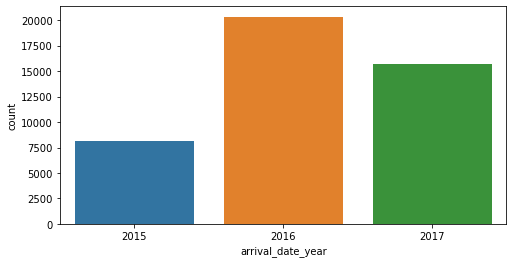

In [19]:
fig = plt.figure(figsize = (8,4))
booking_df = hotel_booking_df[(hotel_booking_df['is_canceled'] == 1)]
sns.countplot(x='arrival_date_year', data = booking_df)

## Insights:
Cancellations were at peak in year 2016, followed by 2017.

## Peak Booking and Cancellation Months


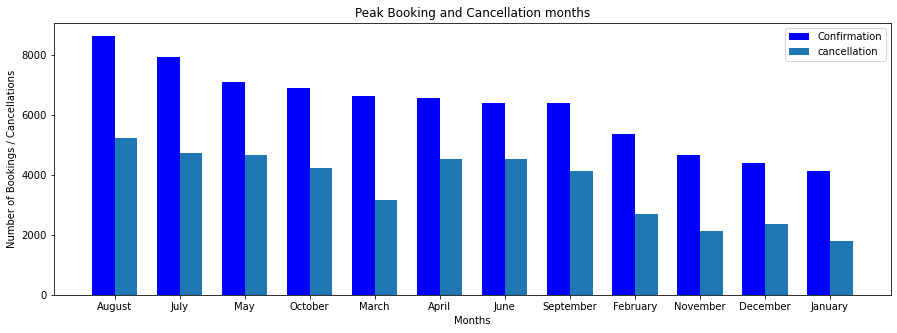

In [20]:
N =12
fig , ax = plt.subplots()
ind = np.arange(N)
width =.35
###########
is_cancelled_zero_df = hotel_booking_df[(hotel_booking_df['is_canceled'] == 0)]
is_cancelled_one_df = hotel_booking_df[(hotel_booking_df['is_canceled'] == 1)]
# storing the counts of 0's and 1's of each month in 'cnts' dataframe in descending order of counts.
cnts = pd.DataFrame()
cnts['confirmation'] = is_cancelled_zero_df['arrival_date_month'].sort_values(ascending = False).value_counts()
cnts['cancellation'] = is_cancelled_one_df['arrival_date_month'].sort_values(ascending = False).value_counts()
###########
ax.bar(ind, cnts["confirmation"], width, label='Confirmation', color ="Blue")
ax.bar(ind + width, cnts["cancellation"], width,label='cancellation')
ax.set_title("Peak Booking and Cancellation months")
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(cnts.index)
ax.set_xlabel("Months")
ax.set_ylabel("Number of Bookings / Cancellations")
ax.legend()
plt.show()
#print(cnts)

## Insights:
- People preferably explore places during July, August.

## Peak booking & cancellation months across years

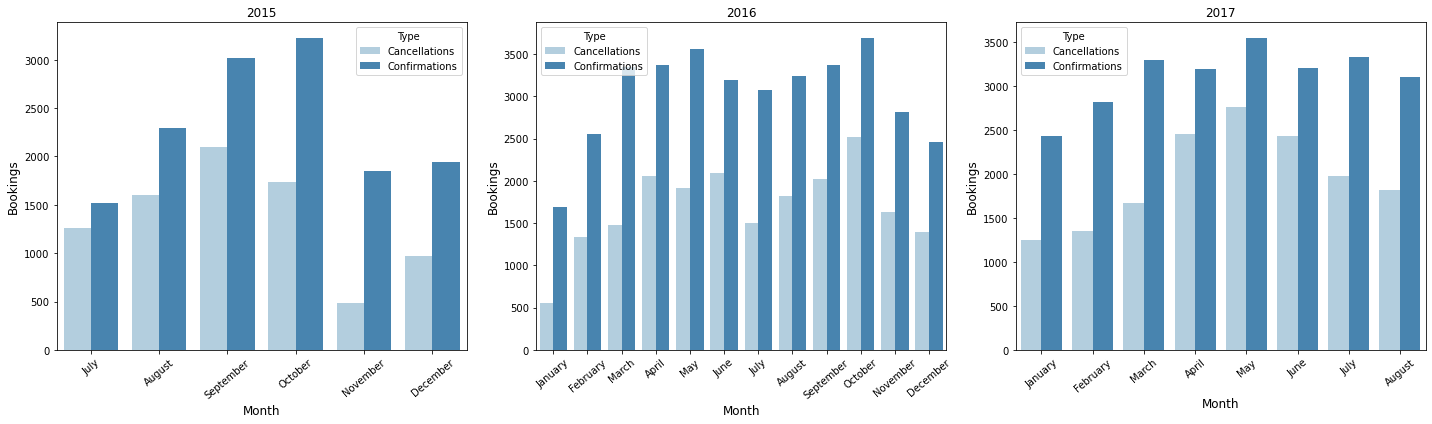

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize= (20,6),squeeze=False)
year                 = [2015, 2016, 2017]

for i in range(0,3):
    df                           = hotel_booking_df[hotel_booking_df['arrival_date_year'] == year[i]]
    df_group_by                  = df.groupby(['arrival_date_month'])['is_canceled'].agg({'count', 'sum'}).reset_index()
    df_group_by['Confirmations'] = df_group_by['count'] - df_group_by['sum']
    df_group_by.columns          = ['arrival_date_month', 'count', 'Cancellations' , 'Confirmations']
    df_group_by                  = df_group_by.drop(['count'], axis=1)

#Appending Dataframes to create a grouped bar chart
    df_1                         = df_group_by[['arrival_date_month', 'Cancellations']]
    df_1['Type']                 = "Cancellations"
    df_1.columns                 = ['arrival_date_month', 'Value', 'Type']

    df_2                         = df_group_by[['arrival_date_month', 'Confirmations']]
    df_2['Type']                 = "Confirmations"
    df_2.columns                 = ['arrival_date_month', 'Value', 'Type']

    df_all                       = df_1.append(df_2, ignore_index=True)
    df_all['month']              = pd.to_datetime(df_all.arrival_date_month, format='%B').dt.month
    df_all                       = df_all.sort_values(by='month')
    #print(df_all)
    xlabels                      = list(df_all['arrival_date_month'].unique())
    sns.barplot(x = 'arrival_date_month',y = 'Value',hue = 'Type',data = df_all,palette = "Blues",ax=axes[0][i])
    axes[0][i].set_ylabel('Bookings', fontsize=12)
    axes[0][i].set_xlabel("Month", fontsize =12)
    axes[0][i].set_title(year[i], fontsize=12)
    axes[0][i].set_xticklabels(xlabels, rotation=40)

plt.tight_layout()    
plt.show()

## Insights:
- Visitors are less during the end of the year(Nov & Dec) compared to mid season.

## Types of hotel
- City Hotel
- Resort Hotel

In [22]:
print(hotel_booking_df['hotel'].unique())

['Resort Hotel' 'City Hotel']


## Resort Hotel - Peak Booking and cancellation months across years


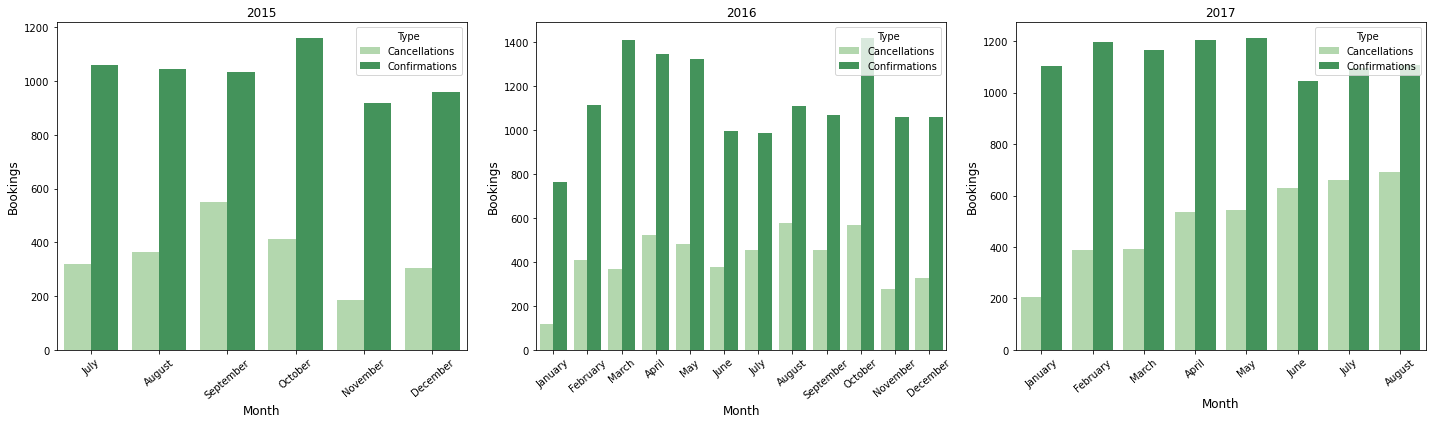

In [23]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize= (20,6),squeeze=False)
year                 = [2015, 2016, 2017]
for i in range(0,3):
    df                           = hotel_booking_df[(hotel_booking_df['arrival_date_year'] == year[i]) & (hotel_booking_df['hotel'] == 'Resort Hotel')]
    #print(df)
    df_group_by                  = df.groupby(['arrival_date_month'])['is_canceled'].agg({'count', 'sum'}).reset_index()
    #print(df_group_by)
    df_group_by['Confirmations'] = df_group_by['count'] - df_group_by['sum']
    df_group_by.columns          = ['arrival_date_month', 'count', 'Cancellations' , 'Confirmations']
    df_group_by                  = df_group_by.drop(['count'], axis=1)
    #print(df_group_by)

#Appending Dataframes to create a grouped bar chart
    df_1                         = df_group_by[['arrival_date_month', 'Cancellations']]
    df_1['Type']                 = "Cancellations"
    df_1.columns                 = ['arrival_date_month', 'Value', 'Type']

    df_2                         = df_group_by[['arrival_date_month', 'Confirmations']]
    df_2['Type']                 = "Confirmations"
    df_2.columns                 = ['arrival_date_month', 'Value', 'Type']

    df_all                       = df_1.append(df_2, ignore_index=True)
    df_all['month']              = pd.to_datetime(df_all.arrival_date_month, format='%B').dt.month
    df_all                       = df_all.sort_values(by='month')
    xlabels                      = list(df_all['arrival_date_month'].unique())
    sns.barplot(x = 'arrival_date_month',y = 'Value',hue = 'Type',data = df_all,palette = "Greens",ax=axes[0][i])
    axes[0][i].set_ylabel('Bookings', fontsize=12)
    axes[0][i].set_xlabel("Month", fontsize =12)
    axes[0][i].set_title(year[i], fontsize=12)
    axes[0][i].set_xticklabels(xlabels, rotation=40)

plt.tight_layout()    
plt.show()

## City Hotel - Peak Booking and Cancellation months across years

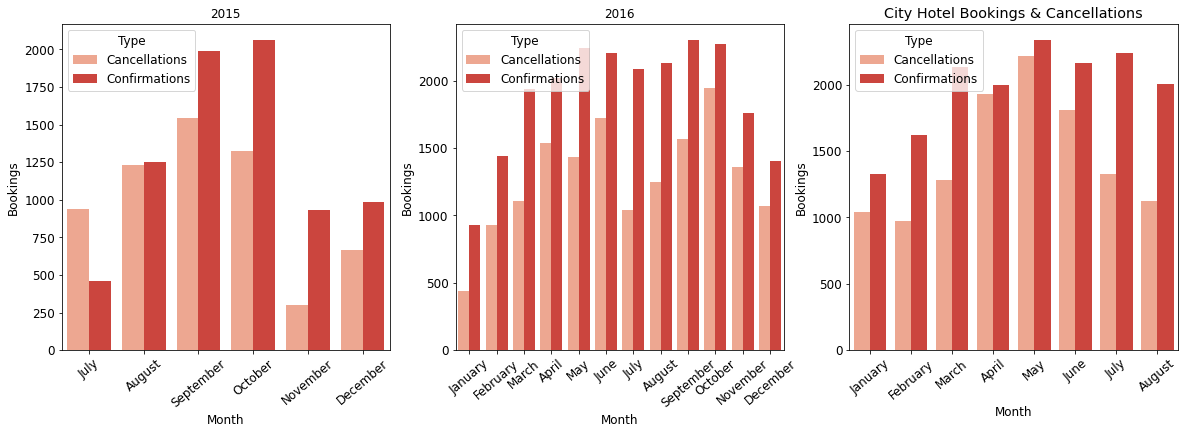

In [82]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize= (20,6),squeeze=False)
year                 = [2015, 2016, 2017]
for i in range(0,3):
    df                           = hotel_booking_df[(hotel_booking_df['arrival_date_year'] == year[i]) & (hotel_booking_df['hotel'] == 'City Hotel')]
    df_group_by                  = df.groupby(['arrival_date_month'])['is_canceled'].agg({'count', 'sum'}).reset_index()
    df_group_by['Confirmations'] = df_group_by['count'] - df_group_by['sum']
    df_group_by.columns          = ['arrival_date_month', 'count', 'Cancellations' , 'Confirmations']
    df_group_by                  = df_group_by.drop(['count'], axis=1)
    #print(df_group_by)

#Appending Dataframes to create a grouped bar chart
    df_1                         = df_group_by[['arrival_date_month', 'Cancellations']]
    df_1['Type']                 = "Cancellations"
    df_1.columns                 = ['arrival_date_month', 'Value', 'Type']

    df_2                         = df_group_by[['arrival_date_month', 'Confirmations']]
    df_2['Type']                 = "Confirmations"
    df_2.columns                 = ['arrival_date_month', 'Value', 'Type']

    df_all                       = df_1.append(df_2, ignore_index=True)
    df_all['month']              = pd.to_datetime(df_all.arrival_date_month, format='%B').dt.month
    df_all                       = df_all.sort_values(by='month')
    xlabels                      = list(df_all['arrival_date_month'].unique())
    sns.barplot(x = 'arrival_date_month',y = 'Value',hue = 'Type',data = df_all,palette = "Reds",ax=axes[0][i])
    axes[0][i].set_ylabel('Bookings', fontsize=12)
    axes[0][i].set_xlabel("Month", fontsize =12)
    axes[0][i].set_title(year[i], fontsize=12)
    axes[0][i].set_xticklabels(xlabels, rotation=40)
plt.title("City Hotel Bookings & Cancellations")
plt.show()

## Insights:
-People love to visit cities more than resorts.

-City Hotels have higher booking rate compared to Resort hotels.


# No. of repeated guests with cancellations & confirmations

In [25]:
hotel_booking_df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [26]:
hotel_booking_df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [27]:
hotel_booking_df['previous_bookings_not_canceled'].value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
36         1
49         1
50         1
63         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

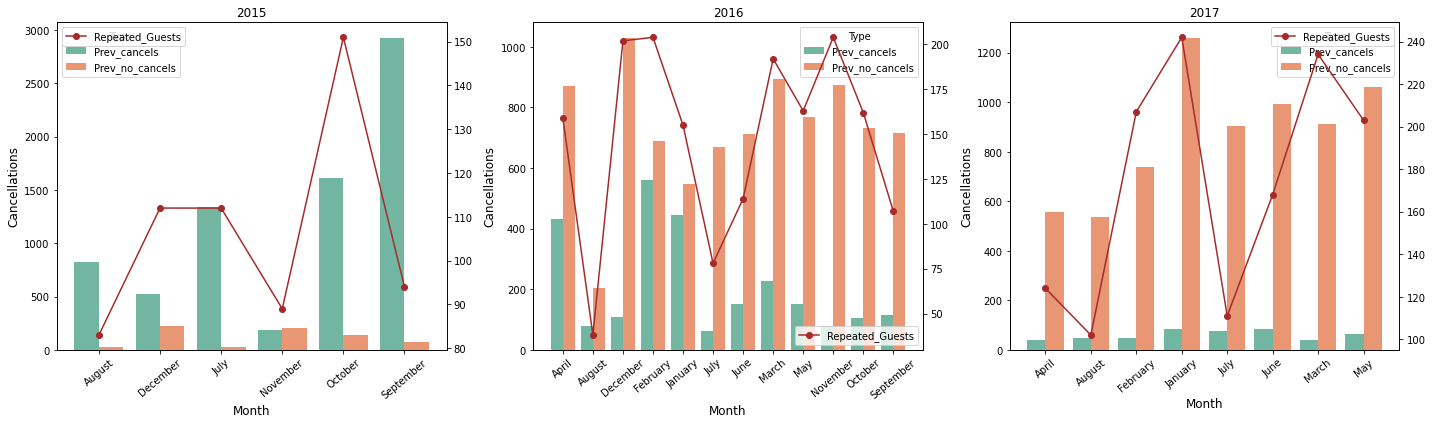

In [28]:
fig, axes = plt.subplots(nrows =1, ncols =3, figsize=(20,6),squeeze = False)
year =  [2015,2016,2017]


for i in range(0,3):
    df                           = hotel_booking_df[hotel_booking_df['arrival_date_year'] == year[i]]
    df_group_by                  = df.groupby(['arrival_date_month'])['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled' ].agg({'sum'}).reset_index()
#Appending Dataframes to create a grouped bar chart
    df_1                         = df_group_by[['arrival_date_month', 'is_repeated_guest']]
    df_1['Type']                 = "Repeated_guest"
    df_1.columns                 = ['arrival_date_month', 'Value', 'Type']

    df_2                         = df_group_by[['arrival_date_month', 'previous_cancellations']]
    df_2['Type']                 = "Prev_cancels"
    df_2.columns                 = ['arrival_date_month', 'Value', 'Type']
    
    df_3                         = df_group_by[['arrival_date_month', 'previous_bookings_not_canceled']]
    df_3['Type']                 = "Prev_no_cancels"
    df_3.columns                 = ['arrival_date_month', 'Value', 'Type']

    df_two                       = df_2.append(df_3, ignore_index=True)
    df_group_by['month']              = pd.to_datetime(df_group_by.arrival_date_month, format='%B').dt.month
    df_group_by                       = df_group_by.sort_values(by='month')

    xlabels                      = list(df_1['arrival_date_month'].unique())
    sns.barplot(x = 'arrival_date_month',y = 'Value',hue = 'Type',data = df_two,palette = "Set2",ax=axes[0][i])
    df_1['Value'].plot(secondary_y=True, ax = axes[0][i], color="brown",marker="o", label = 'Repeated_Guests')
    axes[0][i].set_ylabel('Cancellations', fontsize=12)
    axes[0][i].set_xlabel("Month", fontsize =12)
    axes[0][i].set_title(year[i], fontsize=12)
    axes[0][i].set_xticklabels(xlabels, rotation=40)
    plt.legend(loc=0)

plt.tight_layout()    
plt.show()

## Insights
- Global Health Crisis(Ebola Pandemic in 2014) could have caused lot of cancellations in 2014 - making previous cancellation rate high while booking in 2015.
- Repeated Guests are less likely to make cancellations in August.

# Avg daily rate over years explaining cancellation trend

(119390, 33)
(44224, 33)


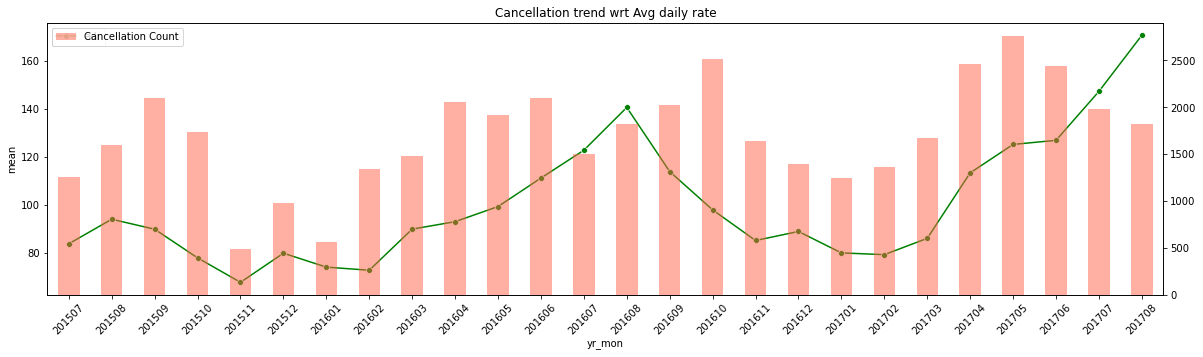

In [29]:
import calendar
plt.figure(figsize=(20,5))

hotel_booking_df['months']             = pd.to_datetime(hotel_booking_df.arrival_date_month, format='%B').dt.month
print(hotel_booking_df.shape)
hotel_booking_df                       = hotel_booking_df[hotel_booking_df['is_canceled'] == 1]
print(hotel_booking_df.shape)
df_groupby                             = hotel_booking_df.groupby(['arrival_date_year','arrival_date_month','months'])['adr'].agg({'mean', 'count'}).reset_index()
df_groupby                             = df_groupby.sort_values(by=['arrival_date_year','months']).reset_index(drop=True)
df_groupby['months']                   = df_groupby['months'].values.astype(str)
df_groupby['arrival_date_year']        = df_groupby['arrival_date_year'].values.astype(str)

#Convert to a double digit month number
def mon_(data_):
    for i in range(0,len(data_)):
        val = data_['months'][i]
        if(len(val)==1):
            val_    = "0" + val
            data_['months'][i] = val_
    return data_
            
df_groupby                             = mon_(df_groupby)
df_groupby['yr_mon']                   = df_groupby['arrival_date_year'] + df_groupby['months']
ax = sns.lineplot(x="yr_mon", y="mean", data = df_groupby,marker ="o",color ='green', label ='adr')
df_groupby['count'].plot(secondary_y=True, kind='bar',color="tomato" ,label = 'Cancellation Count', alpha = .5)
ax.set_xticklabels(df_groupby["yr_mon"],rotation = 45)
ax.set_title("Cancellation trend wrt Avg daily rate")
plt.tight_layout
ax.legend(loc = 0)
plt.legend(loc='upper left')
plt.show()

## Insights
- Average daily rate is less likely to go down with the increase in cancellation rate.
- In August 2017, adr is at peak.
- Adr & Cancellation rate dropped to lowest in Nov 2015.

## Booking Trend with respect to top 5 Countries

In [30]:
df = hotel_booking_df[hotel_booking_df['arrival_date_year'] == 2015]
df_country_group_by                  = df.groupby(['country','arrival_date_year'])['is_canceled'].agg({'count','sum'}).reset_index()
df_country_group_by['confirmation']  = df_country_group_by['count']-df_country_group_by['sum']
df_country_group_by.sort_values(by='confirmation',ascending = False)

,country,arrival_date_year,count,sum,confirmation
0,AGO,2015,4,4,0
1,BEL,2015,17,17,0
2,BRA,2015,5,5,0
3,CN,2015,12,12,0
4,DEU,2015,2,2,0
5,ESP,2015,132,132,0
6,FRA,2015,42,42,0
7,GBR,2015,115,115,0
8,IRL,2015,66,66,0
9,IRN,2015,1,1,0


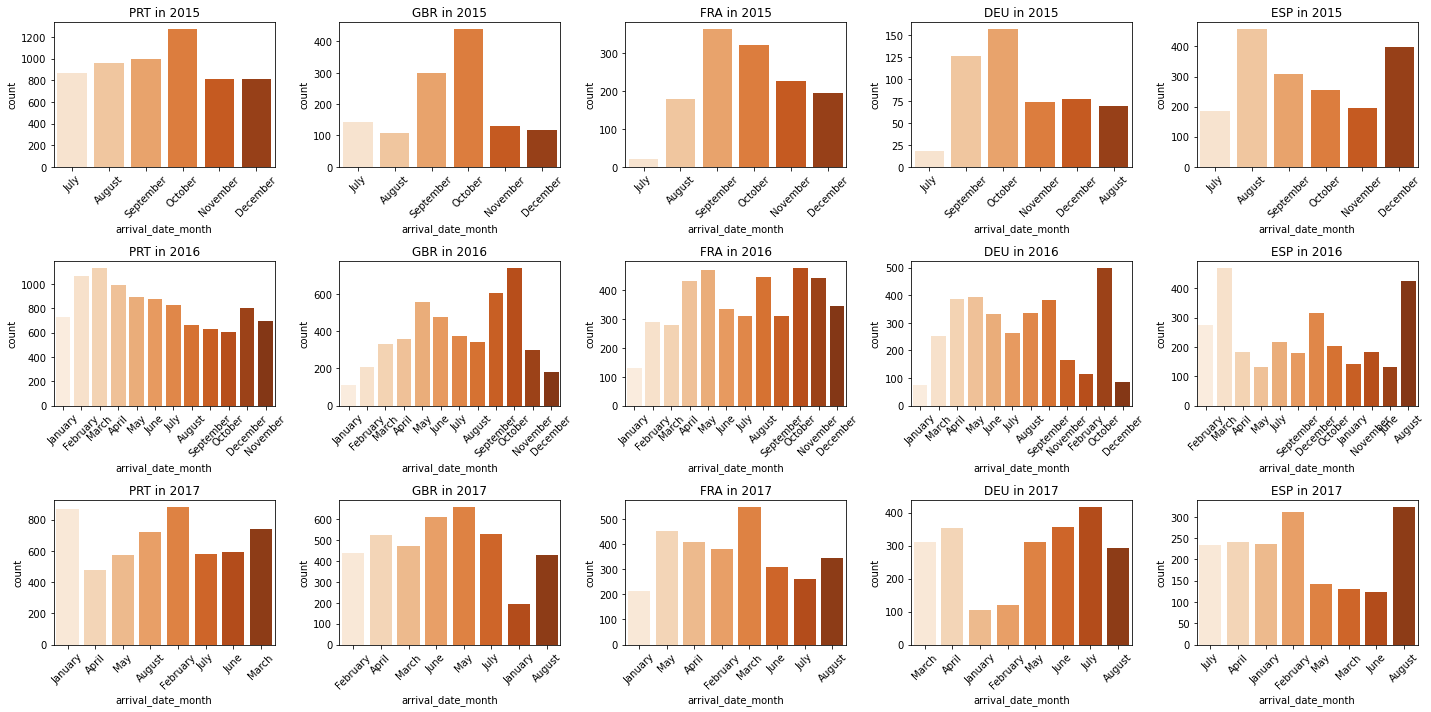

In [31]:
hotel_booking_df = pd.DataFrame(hotel_booking_file)
fig, axes = plt.subplots(nrows =3, ncols =5, figsize=(20,10),squeeze = False)
year =  [2015,2016,2017]
# Five countries with largest booking count
#top_countries_bookings = 
country = ['PRT','GBR','FRA','DEU','ESP']
for i in range(0,3):
    for j in range(0,5):
        df              = hotel_booking_df[(hotel_booking_df['arrival_date_year'] == year[i]) & (hotel_booking_df['country'] == country[j])]
        df              = df[df['is_canceled'] == 0]
        a = sns.countplot(x = 'arrival_date_month', data = df,ax = axes[i][j],palette='Oranges').set_title("{} in {}".format(country[j],year[i]))
        axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=45)
fig.tight_layout()


## Insights
- Tourist visit in Spain is more during December whereas in Portugal its more during Jan to Mar.
- UK(GBR) and France have a decreasing booking trend from Oct - December.

## Average Daily Rate over months from 2015 - 2017


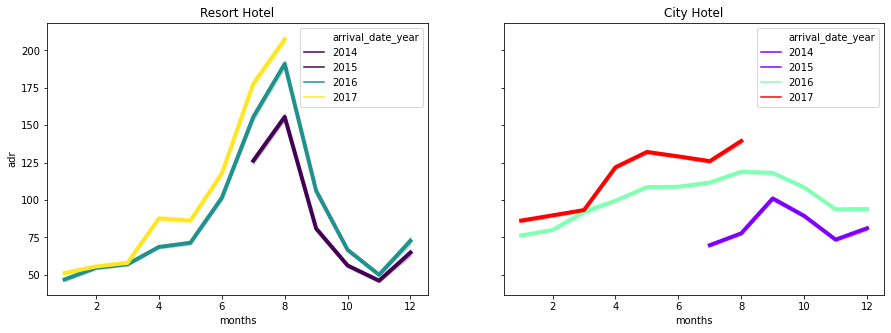

In [32]:
import datetime
ress_data = hotel_booking_df[(hotel_booking_df['hotel'] == 'Resort Hotel')]
city_data = hotel_booking_df[(hotel_booking_df['hotel'] == 'City Hotel')]
months =[]
city_months=[]
#print(type(res_data))
for i in ress_data['arrival_date_month']:
    datetime_object = datetime.datetime.strptime(i, "%B")
    month_number = datetime_object.month
    i = int(month_number)
    months.append(i)
    
ress_data["months"] = months
f, axes = plt.subplots(nrows = 1, ncols =2, sharey=True)
a = sns.lineplot(x = "months" , y ="adr", hue = "arrival_date_year",
                palette="viridis", linewidth=4,data = ress_data , ax = axes[0]).set_title('Resort Hotel')
#################################
for i in city_data['arrival_date_month']:
    datetime_object = datetime.datetime.strptime(i, "%B")
    month_number = datetime_object.month
    i = int(month_number)
    city_months.append(i)
city_data["months"] = city_months
b = sns.lineplot(x = "months" , y ="adr", hue = "arrival_date_year",
                palette="rainbow", linewidth=4,data = city_data , ax = axes[1]).set_title('City Hotel')
plt.show()

## Insights
- July, August is the travel season.
- Resort hotels made maximum profit from bookings in August.
- avg daily rate of resort hotel is at peak in August for all 3 years.
- City hotel made made maximum profit from bookings in August, September.

## Cancellations on weekend and weekday night stay


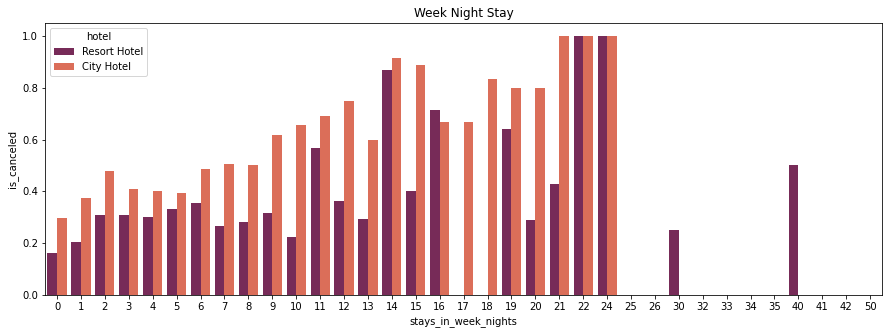

In [33]:
sns.barplot(x= "stays_in_week_nights", y = "is_canceled", hue = 'hotel',palette ='rocket', data = hotel_booking_df, ci=None)     
plt.title('Week Night Stay')
plt.show()
#print(hotel_booking_df['stays_in_week_nights'].unique())

[ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]


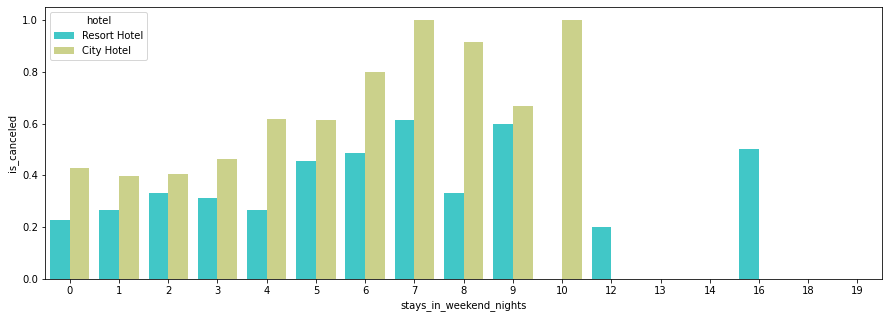

In [34]:
sns.barplot(x= "stays_in_weekend_nights", y = "is_canceled", hue = 'hotel', data = hotel_booking_df,palette='rainbow', ci = None )
print(hotel_booking_df['stays_in_weekend_nights'].unique())

## Insights
- Week nights have more cancellations comapred to weekend nights.
- Week night cancellation for both resort and city hotel are high from mid may.
- No Cancellation for week nights during June 2nd week till June end.
- Cancellations on weekends is high during mid Feb to March.

## Cancellations on long stay

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='is_canceled'>

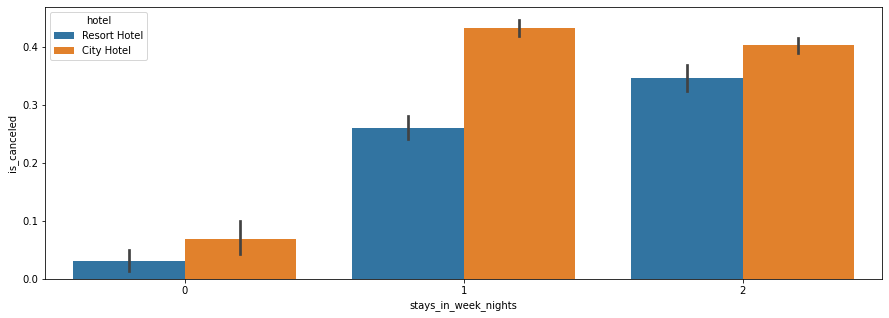

In [35]:
cancls_week_n_weekend = hotel_booking_df[(hotel_booking_df['stays_in_weekend_nights']) ==(hotel_booking_df['stays_in_week_nights'])]
#print(cancls_week_n_weekend.head())
sns.barplot( x = 'stays_in_week_nights',y = 'is_canceled', data = cancls_week_n_weekend, hue='hotel')

## Insights
- Long stay cancellations 
  - of City hotel was high on 1st week and 
  - of Resort hotel was high on 2nd week.


## Countries with booking count and cancellation count
- geographical representation of booking and cancellation count across countries using choropeth


In [36]:
# countries with booking count
countries_booking_df = hotel_booking_df[(hotel_booking_df['is_canceled'] == 0) | (hotel_booking_df['is_canceled'] == 1)]
countries_booking_df = pd.DataFrame(countries_booking_df['country'].value_counts()) 
countries_booking_cnt = pd.DataFrame()
countries_booking_cnt['count'] = countries_booking_df['country']
#print(countries_booking_cnt)

# countries with cancellation count
countries_cancellation_df = hotel_booking_df[(hotel_booking_df['is_canceled'] == 1)]
countries_cancellation_df = pd.DataFrame(countries_cancellation_df['country'].value_counts()) 
countries_cancellation_cnt = pd.DataFrame()
countries_cancellation_cnt['count'] = countries_cancellation_df['country']
#print(countries_cancellation_cnt)


In [37]:
# Booking data and layout
data = dict(
        type = 'choropleth',
        locations = countries_booking_cnt.index,
        z = countries_booking_cnt['count'] ,
        #text = countries_df['country'],
        colorscale = 'RdBu',
        colorbar = {'title':'Country Colors', 'len':200,'lenmode':'pixels' },
      ) 
layout = dict(
    title = 'Country Booking count',
    geo = dict(
        showframe = False,
        projection = {'type':"natural earth"}
    )
)
# Cancellation data and layout
cancellation_data = dict(
        type = 'choropleth',
        locations = countries_cancellation_cnt.index,
        z = countries_cancellation_cnt['count'] ,
        #text = countries_df['country'],
        colorscale = 'Viridis',
        colorbar = {'title':'Country Colors', 'len':200,'lenmode':'pixels' },
      ) 
cancellation_layout = dict(
    title = 'Country Cancellation Count',
    geo = dict(
        showframe = False,
        projection = {'type':"natural earth"}
    )
)

In [38]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

cancl_choromap = go.Figure(data = [cancellation_data],layout = cancellation_layout)
iplot(cancl_choromap)

## Insights:
- Travelers prefer Western European countries.
- Max Booking is from Portugal(48k) and cancellations too from Portugal(27k), followed by GBR.

## Bookings & Cancelations across Market segment

In [39]:
hotel_booking_df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [40]:
mkt_seg_booking = hotel_booking_df[(hotel_booking_df['is_canceled'] == 0)]
mkt_seg_booking = pd.DataFrame(mkt_seg_booking['market_segment'].value_counts())
mkt_seg_booking_cnt = pd.DataFrame()
mkt_seg_booking_cnt['count'] = mkt_seg_booking['market_segment']
print(mkt_seg_booking_cnt)


               count
Online TA      35738
Offline TA/TO  15908
Direct         10672
Groups          7714
Corporate       4303
Complementary    646
Aviation         185


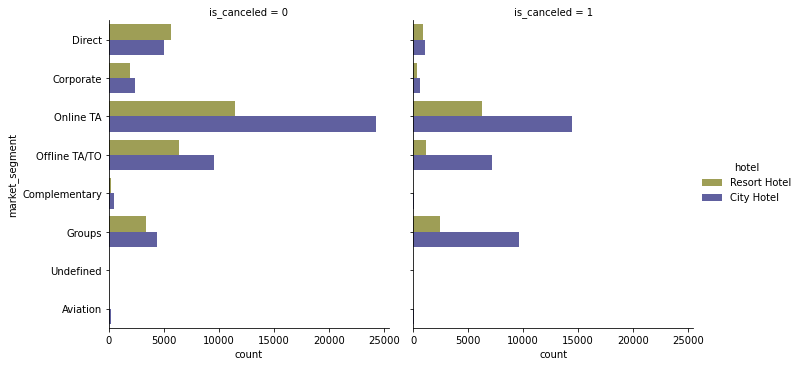

In [41]:
g = sns.catplot(y='market_segment', col="is_canceled", hue='hotel', data=hotel_booking_df, kind ="count",palette='gist_stern_r')
#g.set_yticklabels(rotation =30)
plt.show()

## Insights:
- Attractive discounts could be given to direct & corporate booking to get more bookings from these segments.
- Majority of hotel bookings are through online travel Agents.

## Bookings & Cancelations across Customer Types

In [42]:
hotel_booking_df.customer_type.unique()


array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

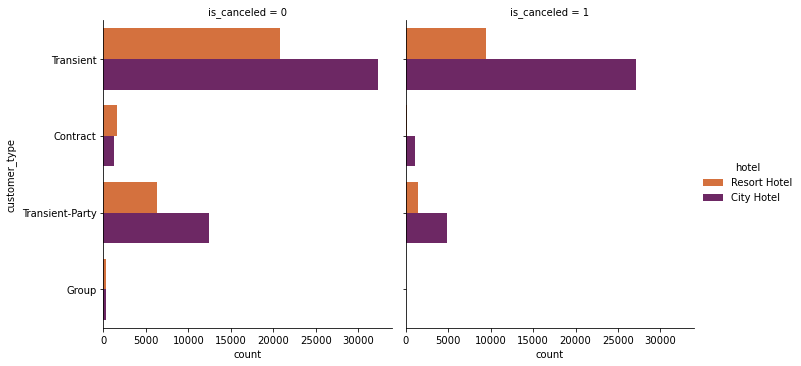

In [43]:
g = sns.catplot(y='customer_type', col="is_canceled", hue='hotel', data=hotel_booking_df, kind ="count",palette='inferno_r')
#g.set_yticklabels(rotation =30)
plt.show()

## Insights
- 10% off on avg daily rate to transient travellers who have made atleast one previous booking and 20% off for those who have 5 or more bookings.
- Maximum bookings are from Transient travellers.

## Booking & cancellations across distribution channels

In [44]:
hotel_booking_df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

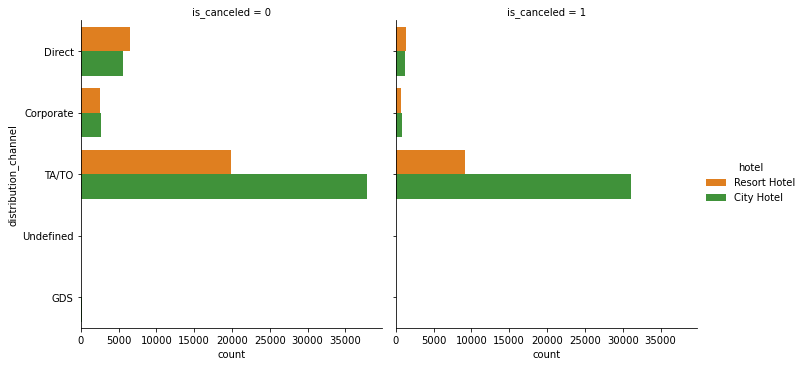

In [45]:
g = sns.catplot(y='distribution_channel', col="is_canceled", hue='hotel', data=hotel_booking_df, kind ="count",palette='Paired_r')
#g.set_yticklabels(rotation =30)
plt.show()

## Insights
- Offer Attractive bonuses to corporate agents & great deals for corporate booking to increase the booking through them.
- Currently, Travel Agents & tour operators are the major source of distribution channels.

## Previous cancellation across market segment


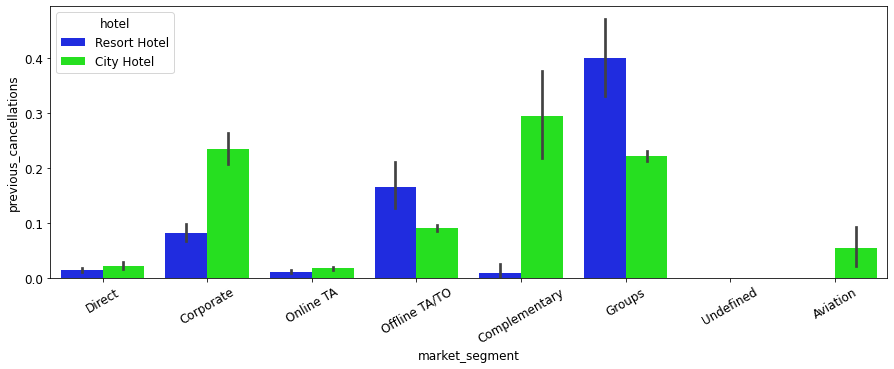

In [83]:
ax = sns.barplot(x ='market_segment',y='previous_cancellations', hue='hotel', data=hotel_booking_df,palette='hsv_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

## Insights
- Marketing strategies could be adopted to reduce the cancellations in both Complimentary & Groups segment.
- Most of the previous Resort hotel cancellations come from - Groups Segment
- Most of the previous city Hotel cancellations come from - Complimentary segment

## Avg Lead time across market segment


<AxesSubplot:xlabel='lead_time'>

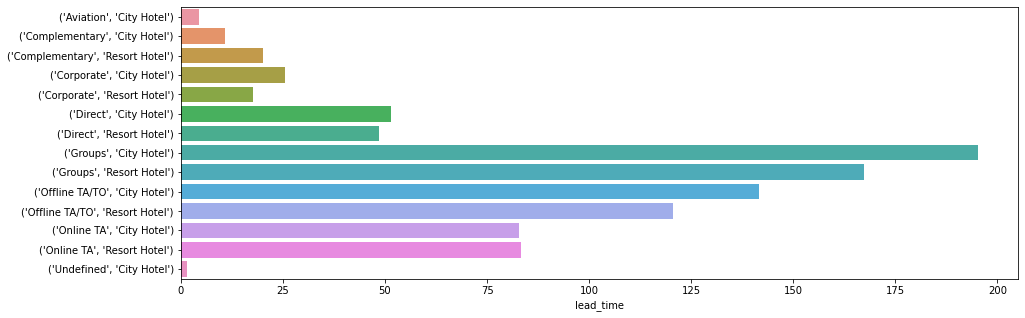

In [47]:
mk= pd.DataFrame(hotel_booking_df.groupby(['market_segment','hotel'])['lead_time'].mean())
sns.barplot(y = mk.index, x = 'lead_time',  data = mk)

## Insights
- Lead time - the time between booking in PMS system and actual arrival date.
- The bookings from groups segment is well planned,way ahead of arrival time for both City & Resort Hotel.

# Correlation
- There exist both positive and negative correlation.

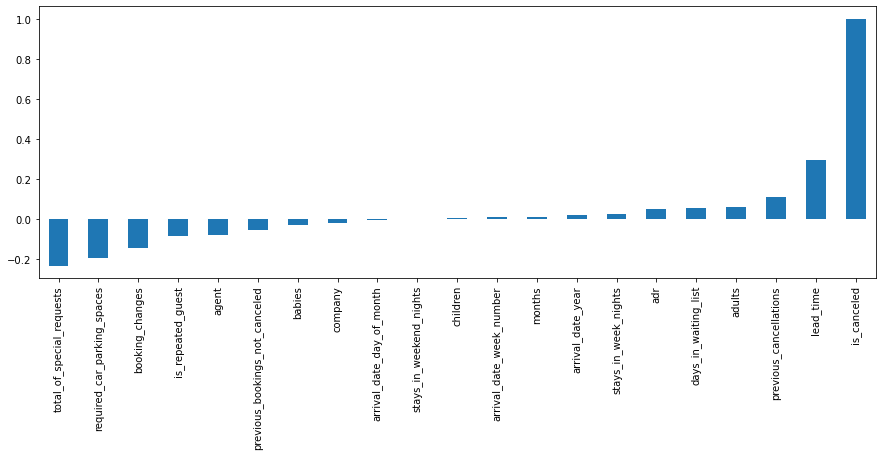

In [48]:
hotel_corr = hotel_booking_df.corr()
hotel_corr['is_canceled'].sort_values().plot(kind = 'bar')
plt.show()

## Converting Categorical features
- Lets convert Categorical fetaures to dummy variables for Machine Learning algorithm to take in those features as input.
- Sort the correlation values in ascending order
- bot_15 has all the 15 highly correlated values.
- top_15 has the top 15 values.

In [49]:
# creating dummies
df_copy          = hotel_booking_df.copy()
df_copy          = df_copy.drop(['reservation_status_date','arrival_date_year','arrival_date_month', 'arrival_date_week_number',
                                 'arrival_date_day_of_month','country','agent','company'] , axis =1)
df_copy          = pd.get_dummies(df_copy)

df_copy          = df_copy[[c for c in df_copy if c not in ['is_canceled']]+['is_canceled']]

In [50]:
# Finding the correlation betwen each of the variables with Dependent
correlations = df_copy.corr()['is_canceled'].sort_values()
print(correlations)

reservation_status_Check-Out   -1.000000
deposit_type_No Deposit        -0.477911
total_of_special_requests      -0.234658
required_car_parking_spaces    -0.195498
market_segment_Direct          -0.154390
                                  ...   
market_segment_Groups           0.221859
lead_time                       0.293123
deposit_type_Non Refund         0.481457
reservation_status_Canceled     0.978435
is_canceled                     1.000000
Name: is_canceled, Length: 68, dtype: float64


reservation_status_Check-Out     -1.000000
deposit_type_No Deposit          -0.477911
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
market_segment_Direct            -0.154390
distribution_channel_Direct      -0.151620
booking_changes                  -0.144381
hotel_Resort Hotel               -0.136531
assigned_room_type_D             -0.128036
customer_type_Transient-Party    -0.124135
is_repeated_guest                -0.084793
market_segment_Corporate         -0.081667
distribution_channel_Corporate   -0.075428
assigned_room_type_E             -0.064794
previous_bookings_not_canceled   -0.057358
Name: is_canceled, dtype: float64


<AxesSubplot:>

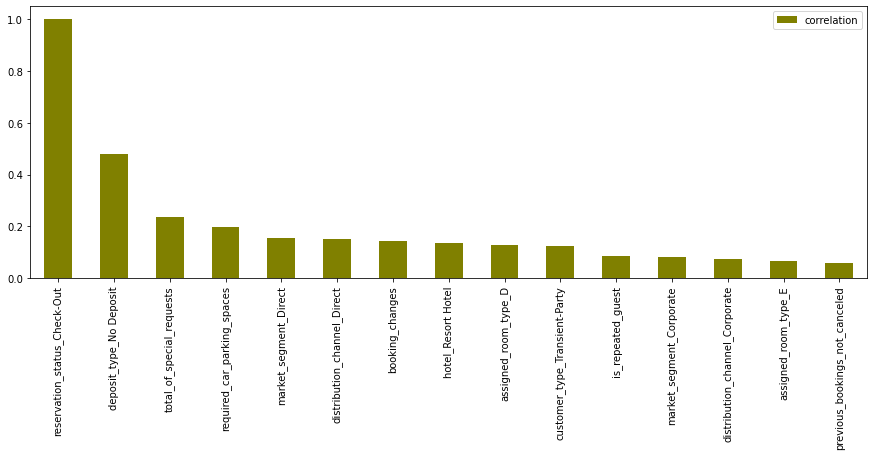

In [51]:
# Taking the Top 15 highly correlated values
top_15 = correlations.head(15)
print(top_15)
data_top_15 = pd.DataFrame(-top_15)
data_top_15.columns = ['correlation']
data_top_15.plot(kind = 'bar', color = "olive")

adr                            0.047557
days_in_waiting_list           0.054186
adults                         0.060017
reserved_room_type_A           0.068643
previous_cancellations         0.110133
reservation_status_No-Show     0.131752
customer_type_Transient        0.133084
hotel_City Hotel               0.136531
distribution_channel_TA/TO     0.175944
assigned_room_type_A           0.197187
market_segment_Groups          0.221859
lead_time                      0.293123
deposit_type_Non Refund        0.481457
reservation_status_Canceled    0.978435
is_canceled                    1.000000
Name: is_canceled, dtype: float64


<AxesSubplot:>

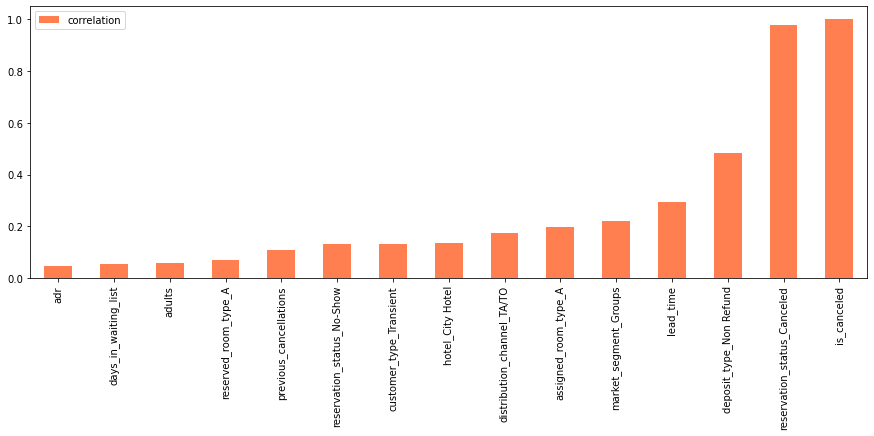

In [52]:
# Taking the bottom 10 highly correlated values
bot_15 = correlations.tail(15)
print(bot_15)
data_bot_15 = pd.DataFrame(bot_15)
data_bot_15.columns = ['correlation']
data_bot_15.plot(kind = 'bar', color= "coral")
#print(bot_15)

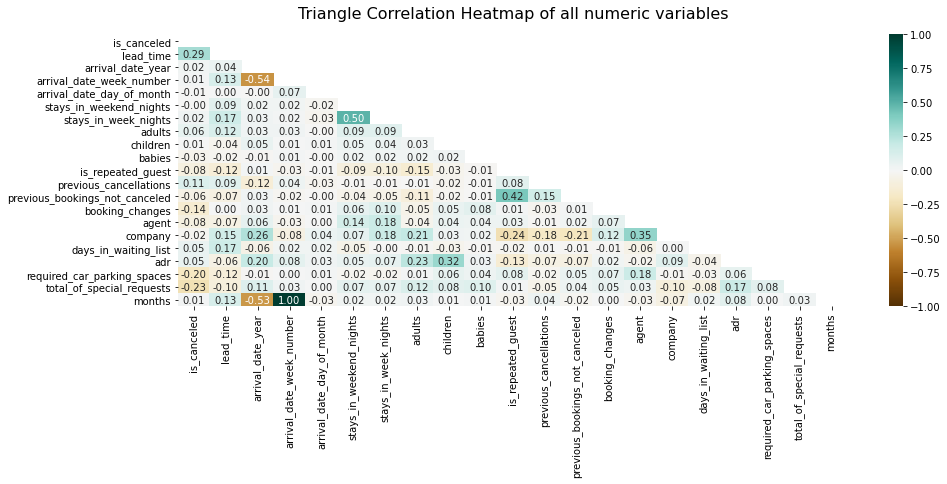

In [53]:
#sns.heatmap(hotel_booking_df.corr(), annot = True)
mask = np.triu(np.ones_like(hotel_booking_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(hotel_booking_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt = '.2f')
heatmap.set_title('Triangle Correlation Heatmap of all numeric variables', fontdict={'fontsize':16}, pad=16);

## HeatMap
- The heatmap shows selected variables for regression model

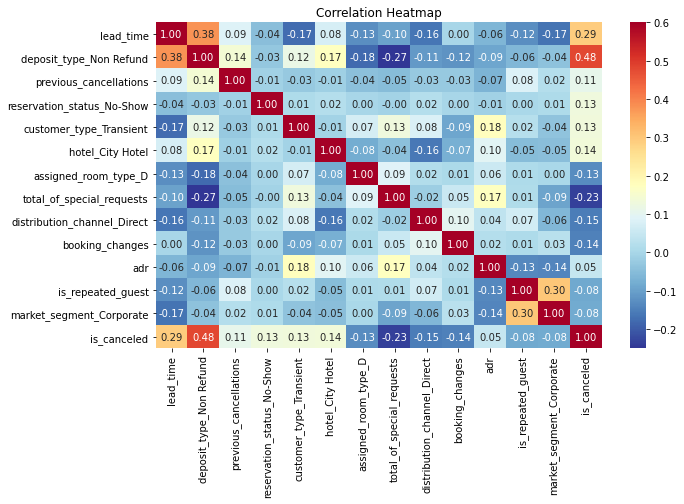

In [54]:
dfcor = df_copy[bot_15.index[-4:-2].append(bot_15.index[4:8]).append(top_15.index[8:9]).append(top_15.index[2:3]).append(top_15.index[5:7]).append(bot_15.index[0:1]).append(top_15.index[10:12]).append(bot_15.index[-1:])].corr()
plt.figure(figsize = (10, 6))
sns.heatmap(dfcor, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,fmt =".2f")
plt.title('Correlation Heatmap');

# Building Logistic Regression Model
- Training the model with the variables shown in heatmap above.
- X will all variables in dfcor except 'iscanceled'
- y will be just 'iscanceled'


In [55]:
train = df_copy[dfcor.columns]
train.isna().sum()

lead_time                      0
deposit_type_Non Refund        0
previous_cancellations         0
reservation_status_No-Show     0
customer_type_Transient        0
hotel_City Hotel               0
assigned_room_type_D           0
total_of_special_requests      0
distribution_channel_Direct    0
booking_changes                0
adr                            0
is_repeated_guest              0
market_segment_Corporate       0
is_canceled                    0
dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = train.drop('is_canceled', axis =1)
y = train['is_canceled']

### Training & Predicting
- Splitting data to train & test set using train_test_split in sklearn library.
- Test Size is 33%
- We are passing train data to logistic regression model to predict the test data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression()

In [61]:
predictions_train = logmodel.predict(X_train)

In [62]:
predictions_test = logmodel.predict(X_test)

## Evaluations
- The test & train set has 79% accuracy.

In [63]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve,auc


In [64]:
    print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     24754
           1       0.86      0.53      0.66     14645

    accuracy                           0.79     39399
   macro avg       0.82      0.74      0.76     39399
weighted avg       0.81      0.79      0.78     39399



In [65]:
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85     50412
           1       0.86      0.53      0.66     29579

    accuracy                           0.79     79991
   macro avg       0.82      0.74      0.75     79991
weighted avg       0.80      0.79      0.78     79991



## Confusion Matrix

In [66]:
cm = confusion_matrix(y_test, predictions_test)
print(cm)

[[23481  1273]
 [ 6821  7824]]


In [67]:
cm_train = confusion_matrix(y_train, predictions_train)
print(cm_train)

[[47751  2661]
 [13841 15738]]


[Text(0, 0.0, 'confirmations'), Text(0, 1.0, 'cancelations'), Text(0, 2.0, '')]

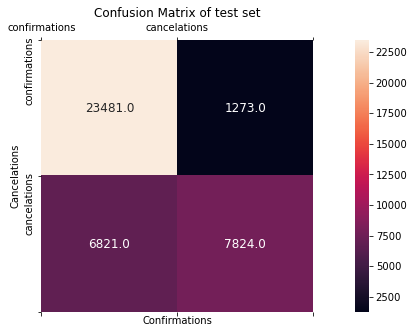

In [68]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt=".1f",annot_kws={'size':12}); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Confirmations')
ax.set_ylabel('Cancelations')
ax.set_title('Confusion Matrix of test set'); 
ax.matshow(cm)
#plt.show()
ax.xaxis.set_ticklabels(['confirmations', 'cancelations'])
ax.yaxis.set_ticklabels(['confirmations','cancelations'])

[Text(0, 0.0, 'confirmations'), Text(0, 1.0, 'cancelations'), Text(0, 2.0, '')]

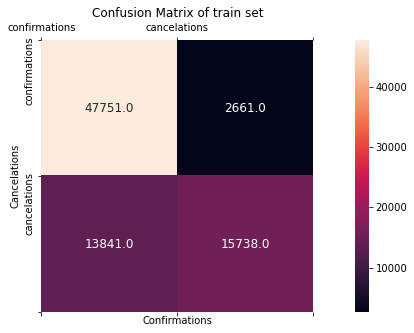

In [69]:
ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax,fmt=".1f",annot_kws={'size':12}); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Confirmations')
ax.set_ylabel('Cancelations')
ax.set_title('Confusion Matrix of train set'); 
ax.matshow(cm)
#plt.show()
ax.xaxis.set_ticklabels(['confirmations', 'cancelations'])
ax.yaxis.set_ticklabels(['confirmations','cancelations'])

## ROC Curve

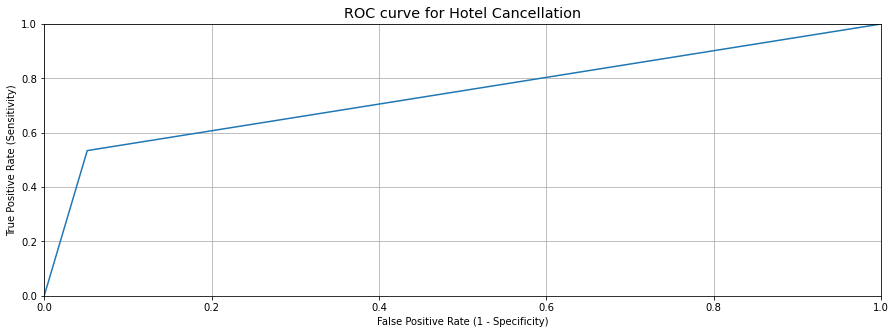

In [70]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
# we pass y_test and y_pred
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = roc_curve(y_test, predictions_test)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Hotel Cancellation')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## AUC Score
The auc score of test data is 74.14% and train data is 73.9%


In [71]:
auc_test = auc(fpr,tpr)
print(auc_test)

0.7414088685240438


In [72]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, predictions_train)
auc_train = auc(fpr_train,tpr_train)
print(auc_train)


0.7396408088711135


## Gini coefficient
- gini coeff. of test data is .482 and train data is .479

In [73]:
gini_test_coeff = 2*auc_test -1
print(gini_test_coeff)


0.4828177370480875


In [74]:
gini_train_coeff = 2*auc_train - 1
print(gini_train_coeff)


0.479281617742227
